In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [14]:
df = pd.read_csv('bbc_text_cls.csv')

In [15]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [16]:
df['target'] = df['labels'].astype('category').cat.codes
df['target'].unique(), df.head()

(array([0, 1, 2, 3, 4], dtype=int8),
                                                 text    labels  target
 0  Ad sales boost Time Warner profit\n\nQuarterly...  business       0
 1  Dollar gains on Greenspan speech\n\nThe dollar...  business       0
 2  Yukos unit buyer faces loan claim\n\nThe owner...  business       0
 3  High fuel prices hit BA's profits\n\nBritish A...  business       0
 4  Pernod takeover talk lifts Domecq\n\nShares in...  business       0)

In [17]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

In [19]:
Ytrain = df_train['target']
Ytest = df_test['target']

In [20]:
#number of classes
K = df['target'].max()+1
K

5

In [22]:
#input dimensions
D = Xtrain.shape[1]
D

25037

In [25]:
#build model
i = Input(shape = (D,))
x = Dense(300, activation = 'relu')(i)
x = Dense(K)(x) #softmax included in loss

model = Model(i,x)

2022-06-19 21:39:06.750200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25037)]           0         
                                                                 
 dense (Dense)               (None, 300)               7511400   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,512,905
Trainable params: 7,512,905
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
    )

In [29]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [32]:
r = model.fit(
    Xtrain, Ytrain,
    validation_data=(Xtest, Ytest),
    epochs=7,
    batch_size = 128,
    )

Epoch 1/7
13/13 [==============================] - 2s 118ms/step - loss: 1.4578 - accuracy: 0.8433 - val_loss: 1.1821 - val_accuracy: 0.9566
Epoch 2/7
13/13 [==============================] - 1s 75ms/step - loss: 0.8975 - accuracy: 0.9923 - val_loss: 0.7303 - val_accuracy: 0.9671
Epoch 3/7
13/13 [==============================] - 1s 75ms/step - loss: 0.4352 - accuracy: 0.9974 - val_loss: 0.4245 - val_accuracy: 0.9716
Epoch 4/7
13/13 [==============================] - 1s 74ms/step - loss: 0.1911 - accuracy: 0.9987 - val_loss: 0.2751 - val_accuracy: 0.9760
Epoch 5/7
13/13 [==============================] - 1s 82ms/step - loss: 0.0921 - accuracy: 1.0000 - val_loss: 0.2081 - val_accuracy: 0.9790
Epoch 6/7
13/13 [==============================] - 1s 90ms/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.1760 - val_accuracy: 0.9790
Epoch 7/7
13/13 [==============================] - 1s 95ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.1575 - val_accuracy: 0.9790


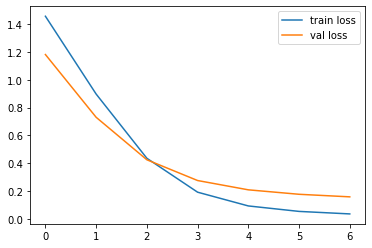

In [33]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show();

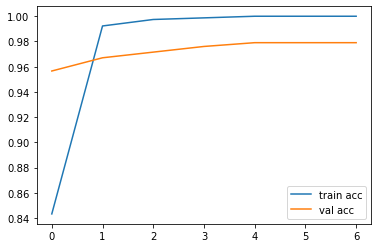

In [34]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show();

<AxesSubplot:>

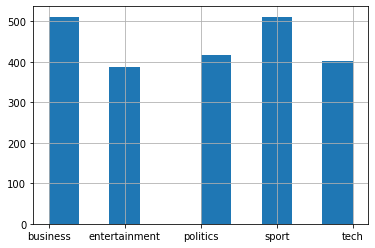

In [36]:
df['labels'].hist()

relatively balanced -> no need to check AUC and F1